<a href="https://colab.research.google.com/github/andressa-uchoas/pretalab/blob/main/andressa_uchoas_atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto 4: Estatística com Python - Probabilidade, Amostragem e Testes

Objetivo: aplicar os conceitos aprendidos sobre Estatística Descritiva, Probabilidade, Amostragem e Testes de Hipóteses.

Executar:

 1. Realizar uma análise descritiva dos dados e responder:

a. Qual é a média, mediana, moda e desvio padrão do tempo de permanência (tenure) dos clientes?

b. Quais são os quartis e percentis do valor das cobranças mensais (monthly charges) e das taxas de rescisão (churn)?

c. Utilize gráficos como histograma e boxplot para visualizar a distribuição dos dados.

2. Escolha uma amostra aleatória de 30% dos dados e utilize a amostragem aleatória simples e estratificada para escolher as amostras, explicando as diferenças entre elas.

a. Calcule a probabilidade de um cliente encerrar o serviço (churn) com base em características como tempo de permanência (tenure) e cobranças mensais (monthly charges).

b. Escolha duas variáveis relevantes (por exemplo, churn e tipo de contrato) e formule uma hipótese nula (H0) e uma hipótese alternativa (H1).

c. Realize um Teste T ou ANOVA para verificar se há diferença significativa nas cobranças mensais entre clientes que cancelam o serviço e aqueles que não cancelam.

d. Analise o valor-p e interprete os resultados.

In [43]:
#Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [44]:
#Importação e criação do dataframe
df_telco = pd.read_csv('/content/telco.csv', delimiter = ',', header = 0,)
df_telco.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.0,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.8,1024.1,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,49.400.000.000.000.000,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [45]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

#Análise descritiva

In [46]:
#Média, mediana, moda e desvio padrão do tempo de permanência (tenure) dos clientes
df_telco['Tenure in Months'].describe()

,Tenure in Months
count,7043.000000
mean,32.386767
std,24.542061
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [47]:
#Quartis e percentis do valor das cobranças mensais (monthly charges) e das taxas de rescisão (churn)
df_telco[['Monthly Charge','Churn Score']].describe()

,Monthly Charge,Churn Score
count,7043.000000,7043.000000
mean,64.761692,58.505040
std,30.090047,21.170031
min,18.250000,5.000000
25%,35.500000,40.000000
50%,70.350000,61.000000
75%,89.850000,75.500000
max,118.750000,96.000000


In [48]:
# Remoção de variáveis categóricas do dataframe
df_int = df_telco.select_dtypes(include=['int64','float64'])
df_int_clean = df_int.drop(columns=['Zip Code','Number of Referrals','Number of Dependents','Satisfaction Score','Total Refunds','Total Charges','Total Extra Data Charges'])
df_int_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Population                         7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Avg Monthly Long Distance Charges  7043 non-null   float64
 4   Avg Monthly GB Download            7043 non-null   int64  
 5   Monthly Charge                     7043 non-null   float64
 6   Churn Score                        7043 non-null   int64  
 7   CLTV                               7043 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 440.3 KB


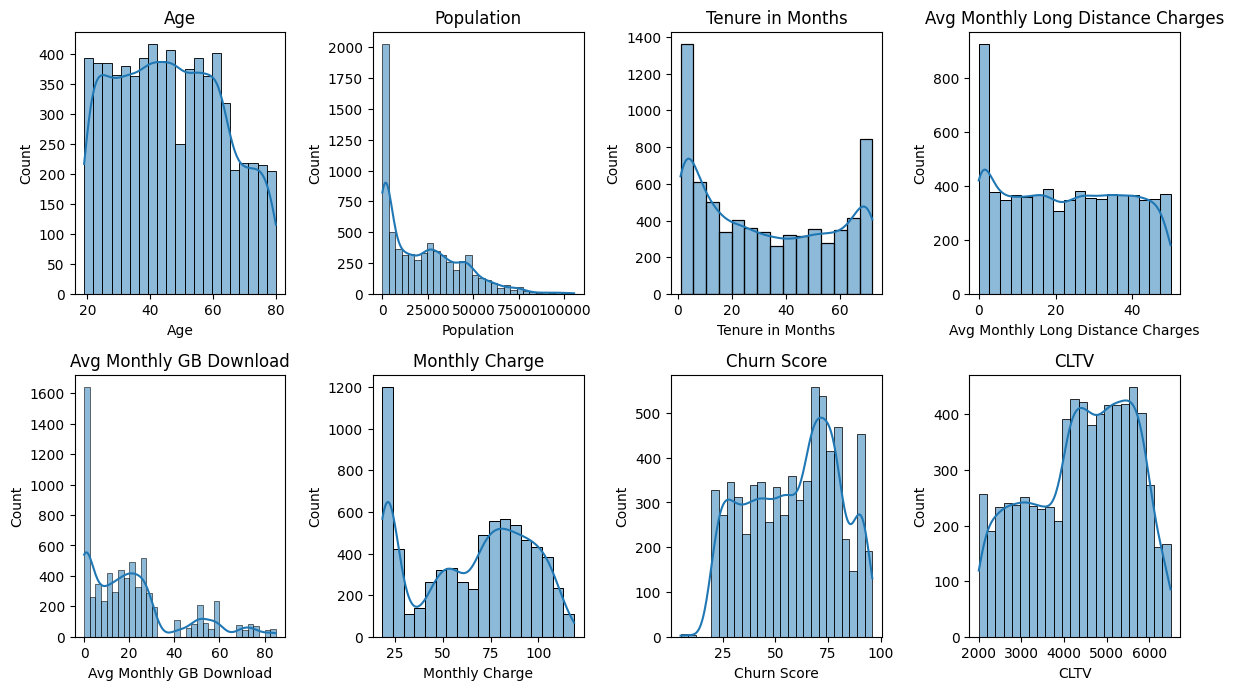

In [49]:
#Histogramas para as variáveis numéricas
plt.figure(figsize=(12, 10))

#Iterando pelas colunas de df_int_clean para gerar os gráficos
for i, col in enumerate(df_int_clean.columns, 1):
    plt.subplot((len(df_int_clean.columns) // 3) + 1, 4, i)
    sns.histplot(df_int_clean[col], kde=True)  #Curva de densidade
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

#Probabilidade, amostragem e testes de hipóteses


Amostragem Aleatória Simples

In [50]:
#Fracionamento do dataframe
fraction = 0.3
df_simple = df_telco.sample(frac=fraction, random_state =42)
df_simple.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
185,1732-VHUBQ,Female,73,No,Yes,Yes,No,0,United States,California,...,0,12.666.499.999.999.900,4548.91,3,Churned,Yes,82,4457,Competitor,Competitor made better offer
2715,6292-TOSSS,Male,64,No,No,No,No,0,United States,California,...,0,2358.0,3553.25,4,Stayed,No,68,4297,NaN,NaN
3825,2546-KZAAT,Male,28,Yes,No,Yes,No,0,United States,California,...,0,5.408.000.000.000.000,4406.25,5,Stayed,No,59,5211,NaN,NaN
1807,4946-EDSEW,Female,35,No,No,Yes,Yes,3,United States,California,...,0,319.11,499.41,1,Churned,Yes,69,5638,Attitude,Attitude of support person
132,9061-TIHDA,Male,67,No,Yes,Yes,No,0,United States,California,...,0,41.209.999.999.999.900,1597.66,1,Churned,Yes,90,2982,Competitor,Competitor had better devices


In [51]:
#Probabilidade de Churn por tempo de permanência (tenure)
prob_churn_tenure = df_simple[df_simple['Churn Label'] == 'Yes']['Tenure in Months'].value_counts(normalize=True) * 100
prob_churn_tenure = prob_churn_tenure.round(1)
print("Probabilidade de Churn por Tenure:")
print(prob_churn_tenure)

Probabilidade de Churn por Tenure:
Tenure in Months
1     20.2
2      5.8
4      5.3
3      4.6
5      4.1
      ... 
60     0.3
44     0.3
64     0.2
63     0.2
72     0.2
Name: proportion, Length: 70, dtype: float64


In [52]:
#Probabilidade de Churn por cobranças mensais (monthly charges)
prob_churn_monthly_charge = df_simple[df_simple['Churn Label'] == 'Yes']['Monthly Charge'].value_counts(normalize=True) * 100
prob_churn_monthly_charge = prob_churn_monthly_charge.round(1)
print("\nProbabilidade de Churn por Monthly Charge:")
print(prob_churn_monthly_charge)


Probabilidade de Churn por Monthly Charge:
Monthly Charge
70.30    0.8
79.90    0.7
19.75    0.7
74.40    0.7
84.40    0.5
        ... 
48.80    0.2
25.10    0.2
19.65    0.2
73.20    0.2
89.75    0.2
Name: proportion, Length: 444, dtype: float64


Distribuição de Churn por Tipo de Contrato (%):
Churn Label            No        Yes
Contract                            
Month-to-Month  52.441230  47.558770
One Year        89.213483  10.786517
Two Year        97.330961   2.669039


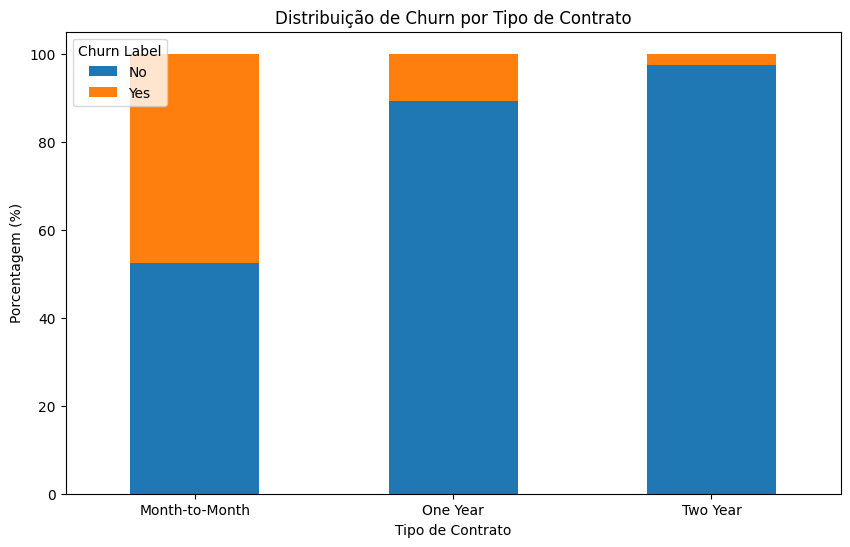

Estatística Qui-quadrado: 455.3768209507279
Valor-p: 1.3067115722303488e-99
Rejeitamos a hipótese nula. Há uma diferença significativa nas taxas de churn entre os diferentes tipos de contrato.


In [53]:
#Hipóteses

#Distribuição de churn para diferentes tipos de contrato
churn_por_contrato = df_simple.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Distribuição de Churn por Tipo de Contrato (%):")
print(churn_por_contrato)

#Gráfico de barras para visualização
churn_por_contrato.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn Label')
plt.show()

#Teste do qui-quadrado para verificar a independência
contingency_table = pd.crosstab(df_simple['Churn Label'], df_simple['Contract'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Estatística Qui-quadrado: {chi2_stat}")
print(f"Valor-p: {p_value}")

#Interpretação do valor-p
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa nas taxas de churn entre os diferentes tipos de contrato.")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença significativa nas taxas de churn entre os diferentes tipos de contrato.")

In [54]:
#Teste T
cobrancas_churn = df_simple[df_simple['Churn Label'] == 'Yes']['Monthly Charge']
cobrancas_nao_churn = df_simple[df_simple['Churn Label'] == 'No']['Monthly Charge']

t_statistic, p_value = stats.ttest_ind(cobrancas_churn, cobrancas_nao_churn)

print(f"Estatística T: {t_statistic}")
print(f"Valor-p: {p_value}")

#Interpretação do valor-p
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa nas cobranças mensais entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença significativa nas cobranças mensais entre os grupos.")

Estatística T: 9.660701873003958
Valor-p: 1.2324942209174213e-21
Rejeitamos a hipótese nula. Há uma diferença significativa nas cobranças mensais entre os grupos.


Amostragem Aleatória Estratificada


In [55]:
#Divisão em estratos
df_estratificada = df_telco.groupby('Gender', group_keys=False).apply(lambda x: x.sample(frac=fraction, random_state=42))
df_estratificada.head()

<ipython-input-55-7382ce21434a>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_estratificada = df_telco.groupby('Gender', group_keys=False).apply(lambda x: x.sample(frac=fraction, random_state=42))


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
579,7868-TMWMZ,Female,69,No,Yes,Yes,No,0,United States,California,...,0,1477.2,8145.55,5,Stayed,No,59,4953,NaN,NaN
5805,8966-OIQHG,Female,49,No,No,Yes,Yes,2,United States,California,...,0,997.7,14.500.500.000.000.000,4,Stayed,No,59,2258,NaN,NaN
6811,4940-KHCWD,Female,61,No,No,Yes,No,0,United States,California,...,0,0.0,2288.7,4,Stayed,No,54,5148,NaN,NaN
2945,9411-TPQQV,Female,31,No,No,No,No,0,United States,California,...,40,0.0,2264.72,3,Stayed,No,74,3533,NaN,NaN
1939,3677-TNKIO,Female,27,Yes,No,No,No,0,United States,California,...,0,507.5,1421.5,1,Churned,Yes,95,3228,Other,Don't know


In [56]:
#Probabilidade de Churn por tempo de permanência (tenure)
prob_churn_tenure = df_estratificada[df_estratificada['Churn Label'] == 'Yes']['Tenure in Months'].value_counts(normalize=True) * 100
prob_churn_tenure = prob_churn_tenure.round(1)
print("Probabilidade de Churn por Tenure:")
print(prob_churn_tenure)

Probabilidade de Churn por Tenure:
Tenure in Months
1     23.3
4      5.8
2      5.3
3      3.9
5      3.4
      ... 
49     0.2
50     0.2
64     0.2
60     0.2
66     0.2
Name: proportion, Length: 71, dtype: float64


In [57]:
#Probabilidade de Churn por cobranças mensais (monthly charges)
churn_monthly_charge = df_estratificada[df_estratificada['Churn Label'] == 'Yes']['Monthly Charge'].value_counts(normalize=True) * 100
churn_monthly_charge = prob_churn_monthly_charge.round(1)
print("\nProbabilidade de Churn por Monthly Charge:")
print(churn_monthly_charge)


Probabilidade de Churn por Monthly Charge:
Monthly Charge
70.30    0.8
79.90    0.7
19.75    0.7
74.40    0.7
84.40    0.5
        ... 
48.80    0.2
25.10    0.2
19.65    0.2
73.20    0.2
89.75    0.2
Name: proportion, Length: 444, dtype: float64


Distribuição de Churn por Tipo de Contrato (%):
Churn Label            No        Yes
Contract                            
Month-to-Month  52.044610  47.955390
One Year        88.818565  11.181435
Two Year        96.619217   3.380783


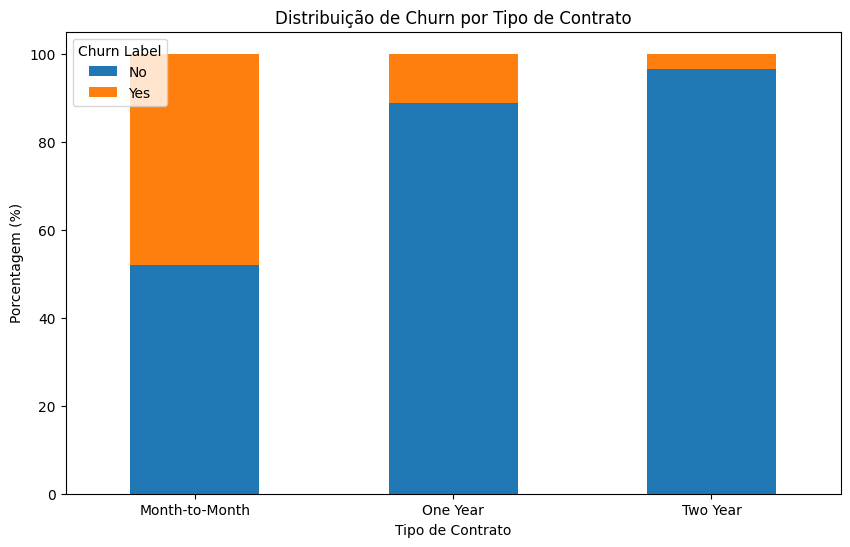

Estatística Qui-quadrado: 455.3768209507279
Valor-p: 1.3067115722303488e-99
Rejeitamos a hipótese nula. Há uma diferença significativa nas taxas de churn entre os diferentes tipos de contrato.


In [58]:
#Hipóteses

#Distribuição de churn para diferentes tipos de contrato
churn_por_contrato = df_estratificada.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Distribuição de Churn por Tipo de Contrato (%):")
print(churn_por_contrato)

#Gráfico de barras para visualização
churn_por_contrato.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn Label')
plt.show()

#Teste do qui-quadrado para verificar a independência
contingency_table = pd.crosstab(df_simple['Churn Label'], df_simple['Contract'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Estatística Qui-quadrado: {chi2_stat}")
print(f"Valor-p: {p_value}")

#Interpretação do valor-p
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa nas taxas de churn entre os diferentes tipos de contrato.")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença significativa nas taxas de churn entre os diferentes tipos de contrato.")

In [59]:
#Teste T
cobrancas_churn = df_estratificada[df_estratificada['Churn Label'] == 'Yes']['Monthly Charge']
cobrancas_nao_churn = df_estratificada[df_estratificada['Churn Label'] == 'No']['Monthly Charge']

t_statistic, p_value = stats.ttest_ind(cobrancas_churn, cobrancas_nao_churn)

print(f"Estatística T: {t_statistic}")
print(f"Valor-p: {p_value}")

#Interpretação do valor-p
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa nas cobranças mensais entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença significativa nas cobranças mensais entre os grupos.")

Estatística T: 8.947550266216751
Valor-p: 7.765842216383791e-19
Rejeitamos a hipótese nula. Há uma diferença significativa nas cobranças mensais entre os grupos.


#Comparação Amostragem Aleatória Simples e Estratificada

**Probabilidade de Churn por Tenure in Months**

**Amostragem Simples**: A maior parte do churn está concentrada nos clientes com 1 mês de permanência (20.2%), seguido por clientes com até 5 meses. Isso indica uma alta taxa de churn nos primeiros meses.

**Amostragem Estratificada**: O padrão geral se mantém, com 1 mês de permanência sendo o maior ponto de churn (23.3%). No entanto, a probabilidade de churn está um pouco mais concentrada nos primeiros meses (1 a 5).

**Probabilidade de Churn por Monthly Charge**

**Amostragem Simples**: A faixa de cobranças mensais mais comuns para churn está entre 70.30 e 84.40, com probabilidades variando entre 0.8% e 0.5%. Os valores são bastante distribuídos em diferentes faixas de cobrança.

**Amostragem Estratificada**: Os resultados são muito semelhantes, com as mesmas faixas de cobrança mensal sendo mais suscetíveis ao churn. A probabilidade de churn por faixa de cobrança não varia muito entre as duas amostragens.

**Distribuição de Churn por Tipo de Contrato | Amostragem Simples**

Month-to-Month: 47.56% dos clientes desse tipo de contrato realizam churn

One Year: Apenas 10.79% de churn

Two Year: Churn ainda menor, apenas 2.67%

**Distribuição de Churn por Tipo de Contrato | Amostragem Estratificada**

Month-to-Month: 47.96% dos clientes desse tipo de contrato realizam churn, praticamente igual à amostragem simples

One Year: 11.18% de churn, um valor próximo ao observado na amostragem simples

Two Year: 3.38% de churn, ligeiramente mais alto do que na amostragem simples

**Teste Qui-quadrado: Diferença nas Taxas de Churn por Tipo de Contrato | Amostragem Simples**

Estatística Qui-quadrado: 455.38

Valor-p: 1.31e-99

**Teste Qui-quadrado: Diferença nas Taxas de Churn por Tipo de Contrato | Amostragem Estratificada**

Estatística Qui-quadrado: 455.38

Valor-p: 1.31e-99

**Teste T: Diferença nas Cobranças Mensais entre Clientes que Cancelam e Não Cancelam | Amostragem Simples**

Estatística T: 9.66

Valor-p: 1.23e-21

**Teste T: Diferença nas Cobranças Mensais entre Clientes que Cancelam e Não Cancelam | Amostragem Estratificada:**

Estatística T: 8.95

Valor-p: 7.77e-19

Em termos de inferência estatística, ambos os métodos são robustos, mas a amostragem estratificada pode oferecer uma distribuição mais equilibrada quando se lida com variáveis como Tenure e Contract, o que pode ser útil dependendo da análise mais detalhada que se deseja realizar.